## Classes of Tautomers
This notebook looks at different classes of tautomerism to see how InChI and OpenEye universal protomer handles them.  
### protropic tautomers and mesomerism captured by both OpenEye and InChI
* protropic tautomers: 
    * amide-imidic acid H−N−C=O ⇌ N=C−O−H  
    * lactam - lactim
    * amino acid - ammonium carboxylate NH2−CH−COOH ⇌ NH3+ −CH−CO2−
    * cyanuric - isocyanuric
    * Some annular tautomerism 
        - 4 pyrimidone
        - triazole  
* mesomers
    * nitromethane
    * azide
    * sulfone
    * phosphinate  
    
### protropic tautomers that only OpenEye captures
   * keto - enol H−O−C=CH ⇌ O=C−CH2
   * enamine - imine H2N−C=C ⇌ N=C−CH3
   * nitro - oxime H−C−N=O ⇌ C=N−O−H
   * Some annular tautomerism
        * pyrazolone
        * diazepine
        * hydroxyfurans
        
### mesomers that only InChI captures
* thiophospinate
* acetamidinium

## Neither OpenEye nor InChI capture these tautomers
* keto-ynol R−CH=C=O ⇌ R−C≡C−OH  
* cyanimide - carbodimide N≡C-N ⇌ N=C=N
* phosphite - phosphonate P(OR)2(OH) ⇌ HP(OR)2(=O) (trivalent and pentavalent phosphorous) 
* some annular tautomerism
    * indoles
    * isoindoles
* cyanate O-C≡N ⇌ O=C=N

In [1]:
from rdkit import Chem
import oenotebook as oenb
from openeye import oechem, oequacpac, oeiupac
import cmiles
from copy import deepcopy
import pandas as pd

In [2]:
def to_dataframe(smiles):
    d = dict()
    d['smiles'] = []
    d['inchi'] = []
    d['inchi_key'] = []
    d['universal_protomer'] = []
    for s in smiles:
        ids = cmiles.to_molecule_id(s)
        d['inchi'].append(ids['standard_inchi'])
        d['inchi_key'].append(ids['inchi_key'])
        d['universal_protomer'].append(ids['unique_protomer_representation'])
        d['smiles'].append(ids['canonical_smiles'])

    df = pd.DataFrame(d)
    df['Molecule'] = df.smiles.apply(cmiles.utils.load_molecule)
    return df

## Visualizing tautomers captured with OpenEye and InChI

,smiles,inchi,inchi_key,universal_protomer,Molecule
0,C(=O)N,"InChI=1S/CH3NO/c2-1-3/h1H,(H2,2,3)",ZHNUHDYFZUAESO-UHFFFAOYSA-N,C(=O)N,
1,C(=N)O,"InChI=1S/CH3NO/c2-1-3/h1H,(H2,2,3)",ZHNUHDYFZUAESO-UHFFFAOYSA-N,C(=O)N,
2,C1CC(=O)NC1,"InChI=1S/C4H7NO/c6-4-2-1-3-5-4/h1-3H2,(H,5,6)",HNJBEVLQSNELDL-UHFFFAOYSA-N,C1CC(=O)NC1,
3,C1CC(=NC1)O,"InChI=1S/C4H7NO/c6-4-2-1-3-5-4/h1-3H2,(H,5,6)",HNJBEVLQSNELDL-UHFFFAOYSA-N,C1CC(=O)NC1,
4,C(C(=O)O)N,"InChI=1S/C2H5NO2/c3-1-2(4)5/h1,3H2,(H,4,5)",DHMQDGOQFOQNFH-UHFFFAOYSA-N,C(C(=O)O)N,
5,C(C(=O)[O-])[NH3+],"InChI=1S/C2H5NO2/c3-1-2(4)5/h1,3H2,(H,4,5)",DHMQDGOQFOQNFH-UHFFFAOYSA-N,C(C(=O)O)N,
6,CC(C(=O)NC(C)C(=O)O)N,"InChI=1S/C6H12N2O3/c1-3(7)5(9)8-4(2)6(10)11/h3-4H,7H2,1-2H3,(H,8,9)(H,10,11)",DEFJQIDDEAULHB-UHFFFAOYSA-N,CC(C(=O)NC(C)C(=O)O)N,
7,CC(C(=O)NC(C)C(=O)[O-])[NH3+],"InChI=1S/C6H12N2O3/c1-3(7)5(9)8-4(2)6(10)11/h3-4H,7H2,1-2H3,(H,8,9)(H,10,11)",DEFJQIDDEAULHB-UHFFFAOYSA-N,CC(C(=O)NC(C)C(=O)O)N,
8,c1cnc[nH]c1=O,"InChI=1S/C4H4N2O/c7-4-1-2-5-3-6-4/h1-3H,(H,5,6,7)",DNCYBUMDUBHIJZ-UHFFFAOYSA-N,c1cnc[nH]c1=O,
9,c1c[nH]cnc1=O,"InChI=1S/C4H4N2O/c7-4-1-2-5-3-6-4/h1-3H,(H,5,6,7)",DNCYBUMDUBHIJZ-UHFFFAOYSA-N,c1cnc[nH]c1=O,

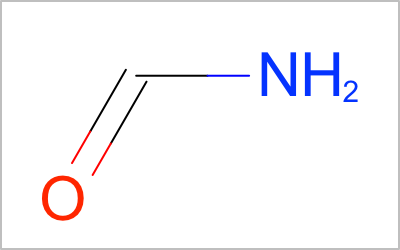
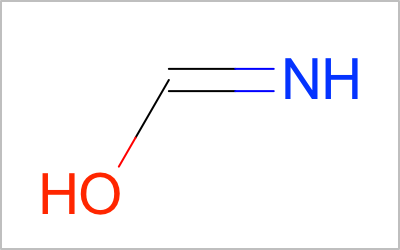
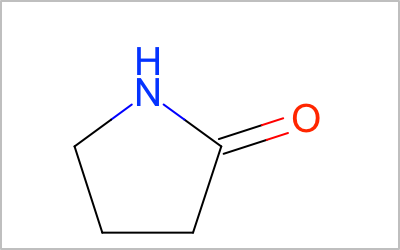
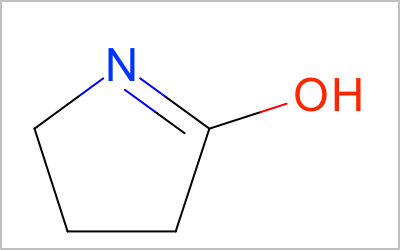
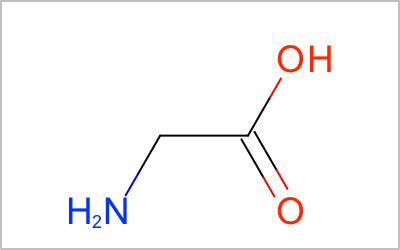
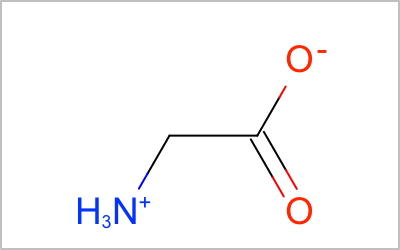
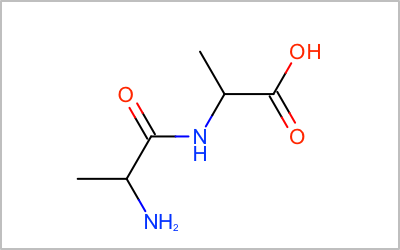
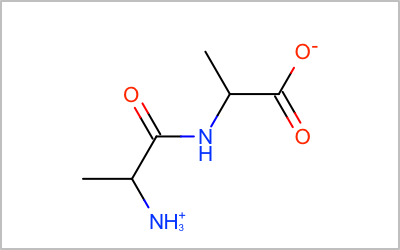
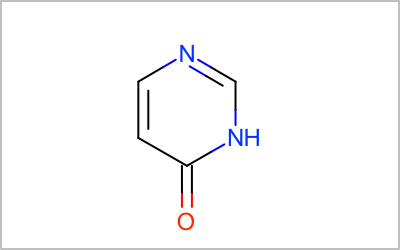
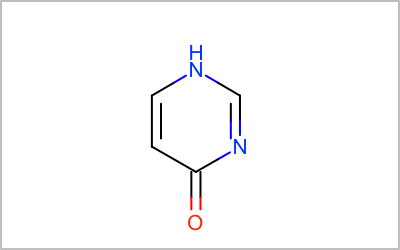
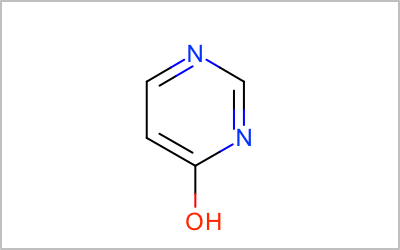
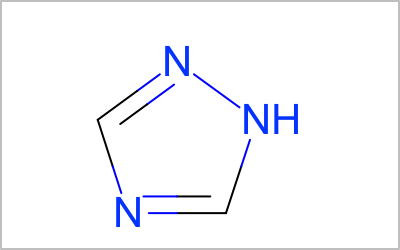
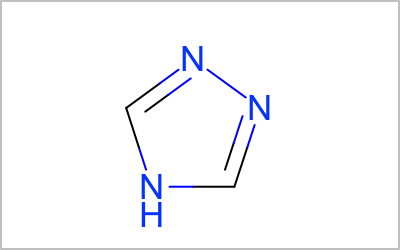
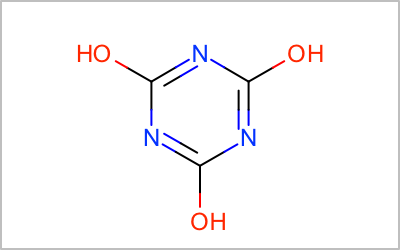
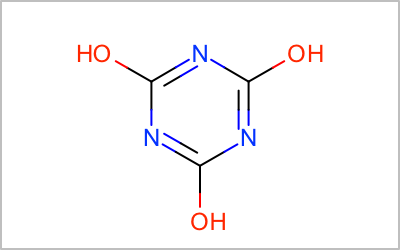
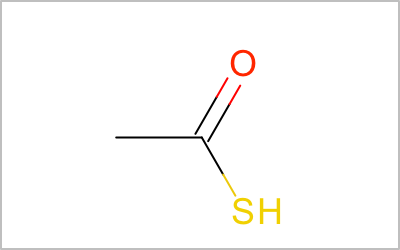
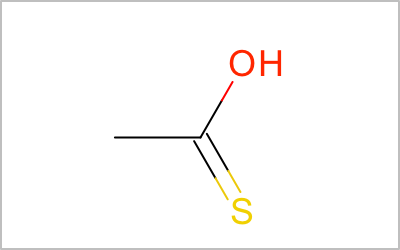
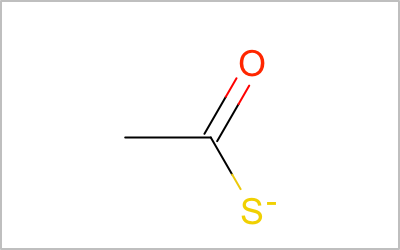
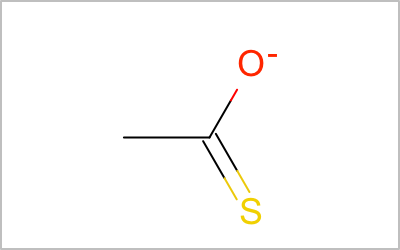

In [3]:
amide = 'NC=O'
imidic_acid = 'N=CO'
lactam = 'C1CC(=O)NC1'
lactim = 'C1CC(O)=NC1'
amino_acid = 'NCC(=O)O'
ammonium_carboxylate = '[NH3+]CC(=O)[O-]'
dialanine_amino_acid = 'C(C(=O)NC(C(=O)O)C)(N)C'
dialanine_zwitterion = 'C(C(=O)NC(C(=O)[O-])C)([NH3+])C'
h1_pyrimodone = 'C1=CN=CNC1=O'
h3_pyrimodone = 'C1=CNC=NC1=O'
enolic_form = 'C1=CN=CN=C1O'
h1_2_4_triazole = 'C1=NC=NN1'
h_2h_4_triazole = 'N1C=NN=C1'
cyanic_acid = 'C1(=NC(=NC(=N1)O)O)O'
cyanuric_acid = 'C1(NC(NC(N1)=O)=O)=O'
thioacetic_acid_1 = 'CC(=O)S[H]'
thioacetic_acid_2 = 'CC(=S)O[H]'
thioacetic_acid_3 = 'CC(=O)[S-]'
thioacetic_acid_4 = 'CC(=S)[O-]'
df = to_dataframe([amide, imidic_acid, lactam, lactim, amino_acid, ammonium_carboxylate, dialanine_amino_acid,
                  dialanine_zwitterion, h1_pyrimodone, h3_pyrimodone, enolic_form, h1_2_4_triazole, h_2h_4_triazole,
                  cyanic_acid, cyanic_acid, thioacetic_acid_1, thioacetic_acid_2, thioacetic_acid_3, thioacetic_acid_4])
oenb.render_dataframe(df)

## Visualizing mesomers captured by OpenEye and InChI

,smiles,inchi,inchi_key,universal_protomer,Molecule
0,CN(=O)=O,InChI=1S/CH3NO2/c1-2(3)4/h1H3,LYGJENNIWJXYER-UHFFFAOYSA-N,C[N+](=O)[O-],
1,C[N+](=O)[O-],InChI=1S/CH3NO2/c1-2(3)4/h1H3,LYGJENNIWJXYER-UHFFFAOYSA-N,C[N+](=O)[O-],
2,CN=N#N,InChI=1S/CH3N3/c1-3-4-2/h1H3,PBTHJVDBCFJQGG-UHFFFAOYSA-N,CN=N#N,
3,CN=[N+]=[N-],InChI=1S/CH3N3/c1-3-4-2/h1H3,PBTHJVDBCFJQGG-UHFFFAOYSA-N,CN=N#N,
4,CS(=O)(=O)C,"InChI=1S/C2H6O2S/c1-5(2,3)4/h1-2H3",HHVIBTZHLRERCL-UHFFFAOYSA-N,CS(=O)(=O)C,
5,C[S+2](C)([O-])[O-],"InChI=1S/C2H6O2S/c1-5(2,3)4/h1-2H3",HHVIBTZHLRERCL-UHFFFAOYSA-N,CS(=O)(=O)C,
6,CP(=O)(C)[O-],"InChI=1S/C2H7O2P/c1-5(2,3)4/h1-2H3,(H,3,4)/p-1",GOJNABIZVJCYFL-UHFFFAOYSA-M,CP(=O)(C)O,
7,C[P+](C)([O-])[O-],"InChI=1S/C2H7O2P/c1-5(2,3)4/h1-2H3,(H,3,4)/p-1",GOJNABIZVJCYFL-UHFFFAOYSA-M,CP(=O)(C)O,

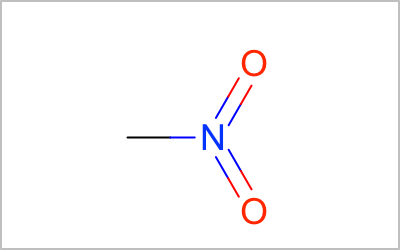
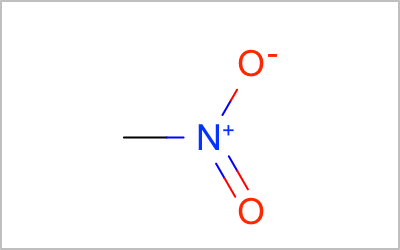
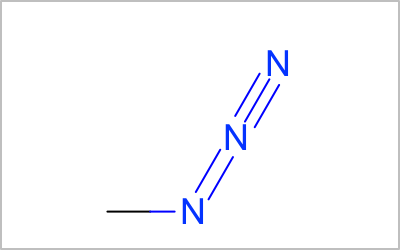
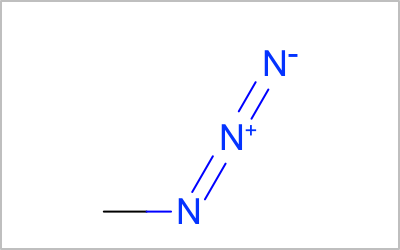
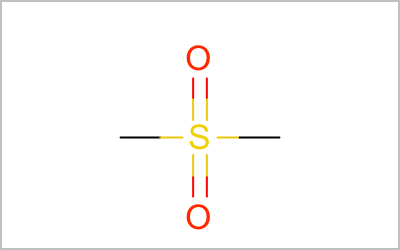
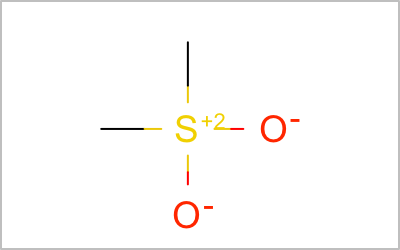
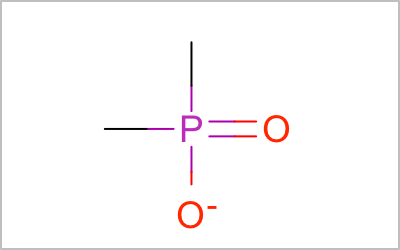
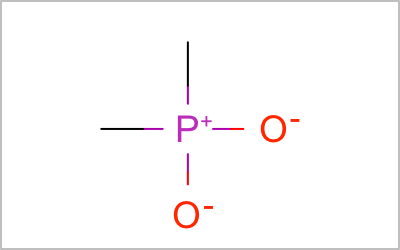

In [4]:
nitro_methane = 'C[N](=O)=O'
nitro_methane_2 = 'C[N+]([O-])=O'
azide = 'CN=[N]#N'
azide_2 = 'CN=[N+]=[N-]'
sulfone = 'C[S](C)(=O)=O'
sulfone_2 ='C[S++](C)([O-])[O-]'
phosphinate = 'C[P](C)(=O)[O-]'
phosphinate_2 = 'C[P+](C)([O-])[O-]'
df = to_dataframe([nitro_methane, nitro_methane_2, azide, azide_2, sulfone, sulfone_2, phosphinate, phosphinate_2])
oenb.render_dataframe(df)

## Visualizing tautomers only captured by OpenEye
(InChI gives them different first 14 key characters)

,smiles,inchi,inchi_key,universal_protomer,Molecule
0,C=CO,"InChI=1S/C2H4O/c1-2-3/h2-3H,1H2",IMROMDMJAWUWLK-UHFFFAOYSA-N,CC=O,
1,CC=O,"InChI=1S/C2H4O/c1-2-3/h2H,1H3",IKHGUXGNUITLKF-UHFFFAOYSA-N,CC=O,
2,C=CN,"InChI=1S/C2H5N/c1-2-3/h2H,1,3H2",UYMKPFRHYYNDTL-UHFFFAOYSA-N,CC=N,
3,CC=N,"InChI=1S/C2H5N/c1-2-3/h2-3H,1H3",MPAYEWNVIPXRDP-UHFFFAOYSA-N,CC=N,
4,CN=O,InChI=1S/CH3NO/c1-2-3/h1H3,IMHRONYAKYWGCC-UHFFFAOYSA-N,CN=O,
5,C=NO,"InChI=1S/CH3NO/c1-2-3/h3H,1H2",SQDFHQJTAWCFIB-UHFFFAOYSA-N,CN=O,
6,c1c[nH][nH]c1=O,"InChI=1S/C3H4N2O/c6-3-1-2-4-5-3/h1-2H,(H2,4,5,6)",XBYRMPXUBGMOJC-UHFFFAOYSA-N,c1c[nH][nH]c1=O,
7,C1C=NNC1=O,"InChI=1S/C3H4N2O/c6-3-1-2-4-5-3/h2H,1H2,(H,5,6)",ZRHUHDUEXWHZMA-UHFFFAOYSA-N,c1c[nH][nH]c1=O,
8,c1cn[nH]c1O,"InChI=1S/C3H4N2O/c6-3-1-2-4-5-3/h1-2H,(H2,4,5,6)",XBYRMPXUBGMOJC-UHFFFAOYSA-N,c1c[nH][nH]c1=O,
9,CC1=NC=CNC=C1,"InChI=1S/C6H8N2/c1-6-2-3-7-4-5-8-6/h2-5,7H,1H3",RHYLTXSSMBIJLK-UHFFFAOYSA-N,CC1=CC=NC=CN1,

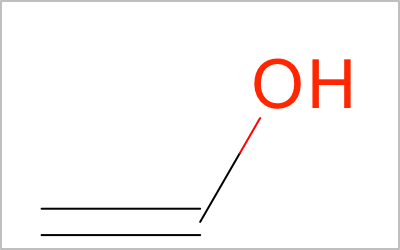
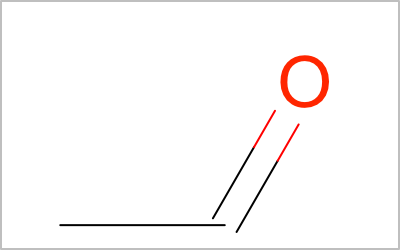
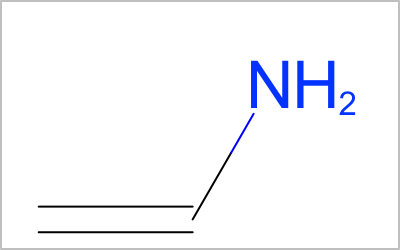
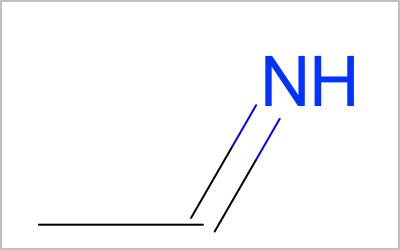
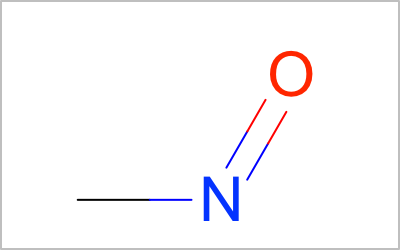
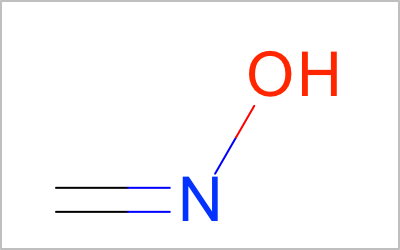
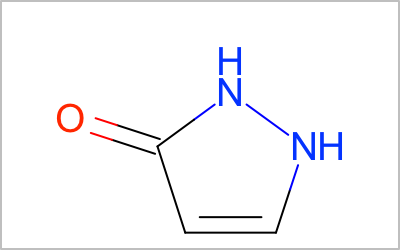
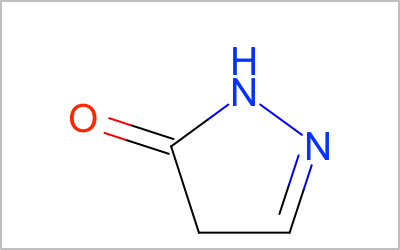
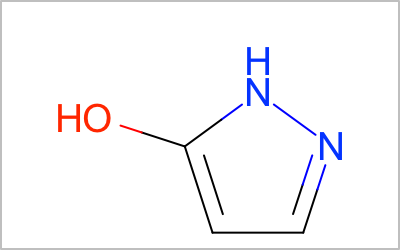
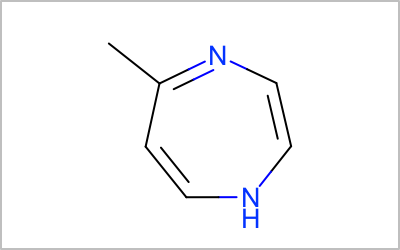
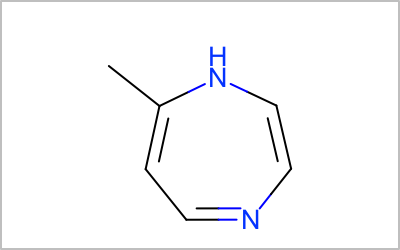
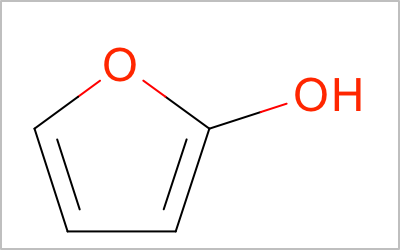
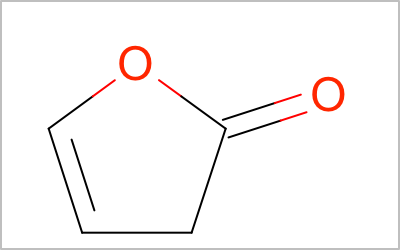
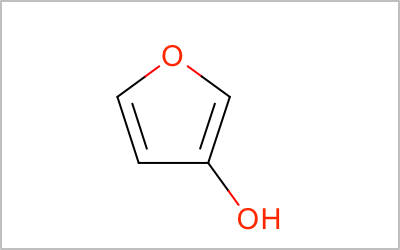
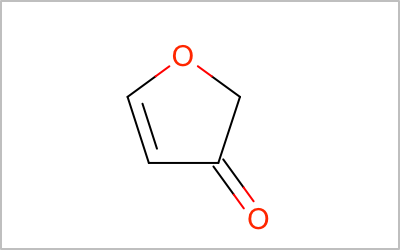

In [5]:
keto = 'OC=C'
enol = 'O=CC'
enamine = '[H]NC=C'
imine = '[H]N=CC'
nitroso = 'CN=O'
oxime = 'C=NO'
pyrazolone = 'C1=CC(NN1)=O'
pyrazolone_2 = 'C1=NNC(C1)=O'
pyrazolone_3 = 'C1(=CC=N[N]1[H])O'
diazepine = 'C1(=NC=CNC=C1)C'
diazepine_2 = 'C1(=CC=NC=CN1)C'
furanol = 'C1=CC=C(O1)O'
furanone = 'C1=CCC(O1)=O'
furanol_2 = 'C1=CC(=CO1)O'
furnone_2 = 'C1=CC(CO1)=O'
df = to_dataframe([keto, enol, enamine, imine, nitroso, oxime, pyrazolone, pyrazolone_2, pyrazolone_3,
                  diazepine, diazepine_2, furanol, furanone, furanol_2, furnone_2])
oenb.render_dataframe(df)

## Visualizing mesomers only captured by InChI
(Openeye gives them different unique protomers)


,smiles,inchi,inchi_key,universal_protomer,Molecule
0,CP(=O)(C)S,"InChI=1S/C2H7OPS/c1-4(2,3)5/h1-2H3,(H,3,5)",DQIMSUZRBYLFOT-UHFFFAOYSA-N,CP(=O)(C)S,
1,CP(=S)(C)O,"InChI=1S/C2H7OPS/c1-4(2,3)5/h1-2H3,(H,3,5)",DQIMSUZRBYLFOT-UHFFFAOYSA-N,CP(=S)(C)O,
2,CP(=O)(C)[S-],"InChI=1S/C2H7OPS/c1-4(2,3)5/h1-2H3,(H,3,5)/p-1",DQIMSUZRBYLFOT-UHFFFAOYSA-M,CP(=O)(C)S,
3,CP(=S)(C)[O-],"InChI=1S/C2H7OPS/c1-4(2,3)5/h1-2H3,(H,3,5)/p-1",DQIMSUZRBYLFOT-UHFFFAOYSA-M,CP(=S)(C)O,
4,CC(=[NH2+])N,"InChI=1S/C2H6N2/c1-2(3)4/h1H3,(H3,3,4)/p+1",OQLZINXFSUDMHM-UHFFFAOYSA-O,CC(=N)N,
5,C[C+](N)N,"InChI=1S/C2H6N2/c1-2(3)4/h1H3,(H3,3,4)/p+1",OQLZINXFSUDMHM-UHFFFAOYSA-O,CC(=[NH2+])N,

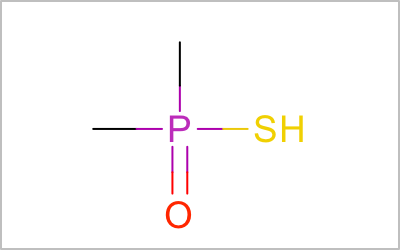
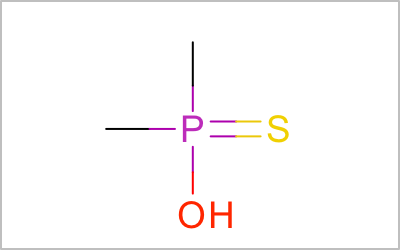
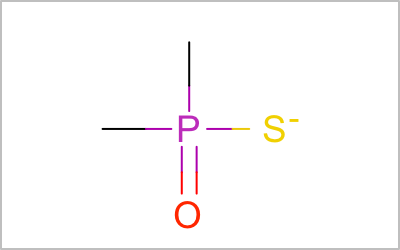
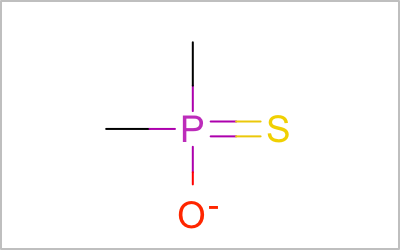
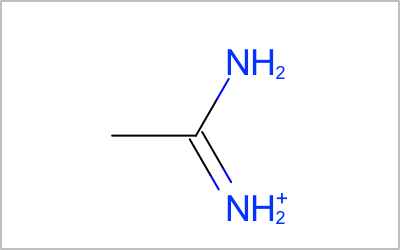
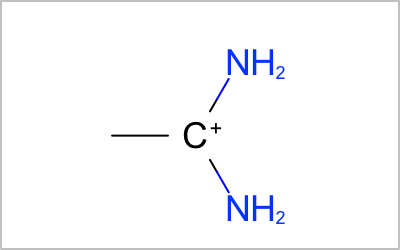

In [6]:
thiophosphinate = 'C[P](C)(=O)S'
thiophosphinate_2 = 'C[P](C)(O)=S'
thiophosphinate_3 = 'C[P](C)(=O)[S-]'
thiophosphinate_4 = 'C[P](C)([O-])=S'
acetamidinium = 'C(C)(=[N+]([H])[H])N([H])[H]'
acetamidinium_2 = '[C+](C)([NH2])[NH2]'
df = to_dataframe([thiophosphinate, thiophosphinate_2, thiophosphinate_3, thiophosphinate_4, 
                  acetamidinium, acetamidinium_2])
oenb.render_dataframe(df)

## Visualizing tautomers and mesomers that are captured by neither

,smiles,inchi,inchi_key,universal_protomer,Molecule
0,C=C=O,InChI=1S/C2H2O/c1-2-3/h1H2,CCGKOQOJPYTBIH-UHFFFAOYSA-N,C=C=O,
1,C#CO,"InChI=1S/C2H2O/c1-2-3/h1,3H",QFXZANXYUCUTQH-UHFFFAOYSA-N,C#CO,
2,C(#N)N,InChI=1S/CH2N2/c2-1-3/h2H2,XZMCDFZZKTWFGF-UHFFFAOYSA-N,C(#N)N,
3,C(=N)=N,InChI=1S/CH2N2/c2-1-3/h2-3H,VPKDCDLSJZCGKE-UHFFFAOYSA-N,C(=N)=N,
4,[O-]P([O-])[O-],InChI=1S/O3P/c1-4(2)3/q-3,AQSJGOWTSHOLKH-UHFFFAOYSA-N,OP(O)O,
5,[O-]P(=O)=O,"InChI=1S/HO3P/c1-4(2)3/h(H,1,2,3)/p-1",UEZVMMHDMIWARA-UHFFFAOYSA-M,O[P+](=O)[O-],
6,CP(O)O,"InChI=1S/CH5O2P/c1-4(2)3/h2-3H,1H3",PMVVRSKJCGEFIY-UHFFFAOYSA-N,CP(O)O,
7,CP(=O)O,"InChI=1S/CH5O2P/c1-4(2)3/h4H,1H3,(H,2,3)",BCDIWLCKOCHCIH-UHFFFAOYSA-N,CP(=O)O,
8,c1ccc2c(c1)cc([nH]2)O,"InChI=1S/C8H7NO/c10-8-5-6-3-1-2-4-7(6)9-8/h1-5,9-10H",JHFAEUICJHBVHB-UHFFFAOYSA-N,c1ccc2c(c1)cc([nH]2)O,
9,c1ccc2c(c1)CC(=O)N2,"InChI=1S/C8H7NO/c10-8-5-6-3-1-2-4-7(6)9-8/h1-4H,5H2,(H,9,10)",JYGFTBXVXVMTGB-UHFFFAOYSA-N,c1ccc2c(c1)CC(=O)N2,

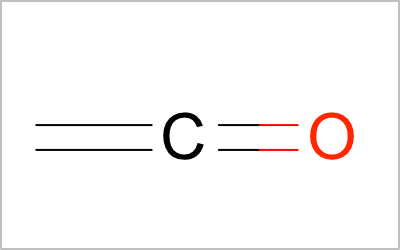
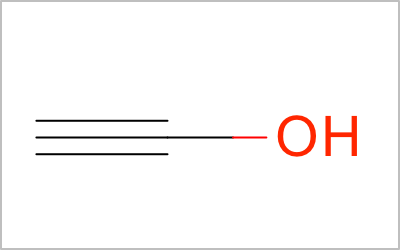
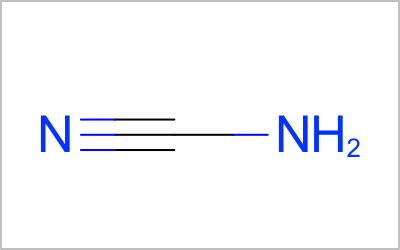
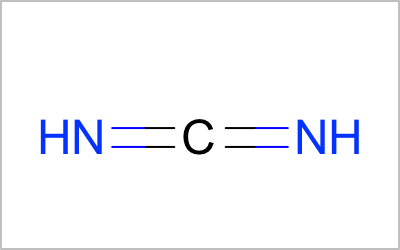
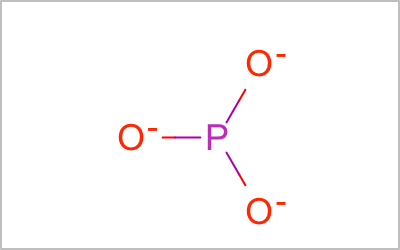
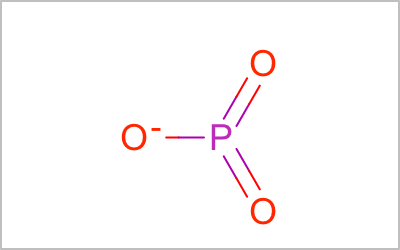
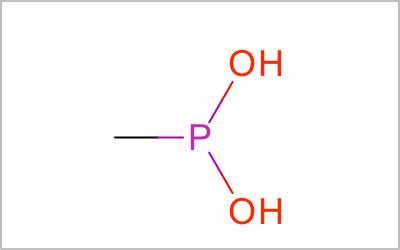
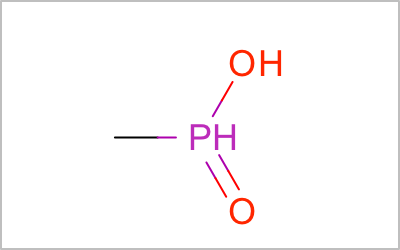
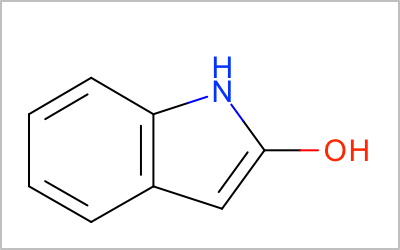
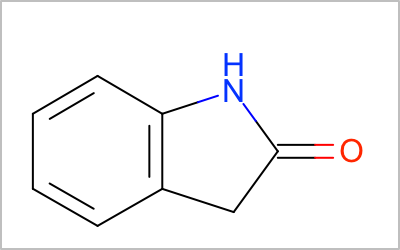
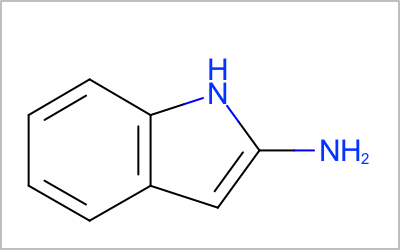
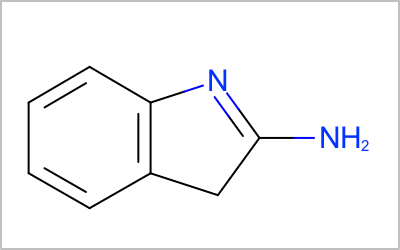
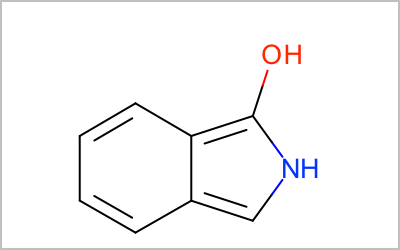
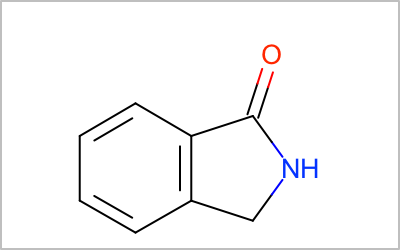
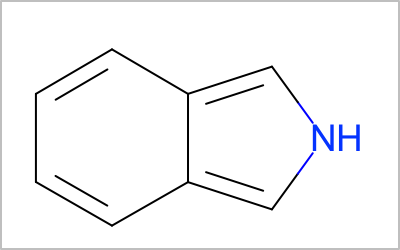
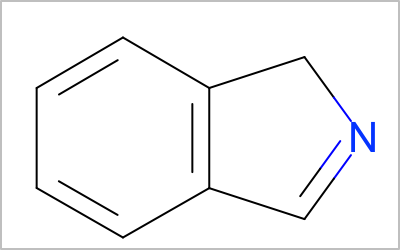
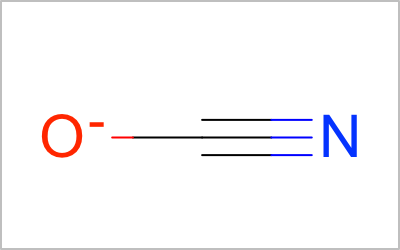
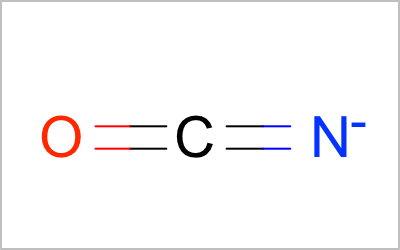

In [9]:
ketene = 'C=C=O'
ynol = 'C#CO'
cyanamide = 'C(#N)N'
carbodiimide = 'C(=N)=N'
phosphite = '[O-]P([O-])[O-]'
phosphonate = '[O-]P(=O)=O'
phosphinic_acid = 'CP(O)O'
hypophosphorous_acid = 'C[P](=O)(O)[H]'
indole_ol = 'C1=CC=CC2=C1[NH]C(=C2)O'
indole_one = 'C1=CC=CC2=C1NC(C2)=O'
indole_1 = 'C1=CC=CC2=C1[NH]C(=C2)N'
indole_2 = 'C1=CC=CC2=C1N=C(C2)N'
isoindole_ol = 'C1=CC=CC2=C([NH]C=C12)O'
isoindole_one = 'C1=CC=CC2=C1CNC2=O'
isoindole_1h = 'c1cccc2c1c[nH]c2'
isoindole_2h = 'C1=CC=CC2=C1C=NC2'
cyanate = 'C(#N)[O-]'
cyanate_2 = 'C(=[N-])=O'
df = to_dataframe([ketene, ynol, cyanamide, carbodiimide, phosphite, phosphonate, phosphinic_acid, 
                   hypophosphorous_acid, indole_ol, indole_one, indole_1, indole_2, isoindole_ol, isoindole_one,
                   isoindole_1h, isoindole_2h, cyanate, cyanate_2])
oenb.render_dataframe(df)

Interesting case from Sayle 2010  
captured by neither

,smiles,inchi_key,universal_protomer,Molecule
0,c1ccc2c(c1)C=CNS2(=O)=O,GHNLJDPNIAIWOQ-UHFFFAOYSA-N,c1ccc2c(c1)C=CNS2(=O)=O,
1,c1ccc2c(c1)C=CN=S2(=O)O,DXWQWRPRKXWWPD-UHFFFAOYSA-N,c1ccc2c(c1)C=CN=S2(=O)O,

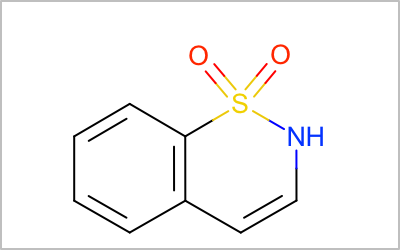
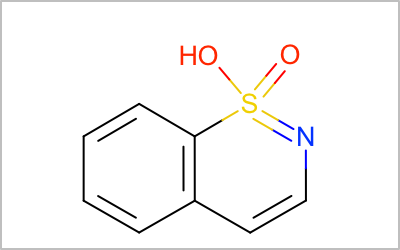

In [8]:
sp3_hybrid_1 = 'C1=CC=CC2=C1[S](NC=C2)(=O)=O'
sp3_hybrid_2 = 'C1=CC=CC2=C1[S](=NC=C2)(=O)O'
df = to_dataframe([sp3_hybrid_1, sp3_hybrid_2])
oenb.render_dataframe(df)

## Ring - Chain and valence tautomerism 
### Should we even go here??
H−O ⋅ C=O ⇌ O−C−O−H
This is not something we can expect ot capture currently. Could be a good use case for mixture InChIs

,smiles,inchi_key,universal_protomer,Molecule
0,C(C(C(C(C(C=O)O)O)O)O)O,GZCGUPFRVQAUEE-SLPGGIOYSA-N,C([C@H]([C@H]([C@@H](C(=CO)O)O)O)O)O,
1,C(C1C(C(C(C(O1)O)O)O)O)O,WQZGKKKJIJFFOK-GASJEMHNSA-N,C([C@@H]1[C@H]([C@@H]([C@H](C(O1)O)O)O)O)O,
2,C(C(C(C(C(C=O)O)O)O)O)O,GZCGUPFRVQAUEE-UHFFFAOYSA-N,C(C(C(C(C(=CO)O)O)O)O)O,
3,C(C1C(C(C(C(O1)O)O)O)O)O,WQZGKKKJIJFFOK-UHFFFAOYSA-N,C(C1C(C(C(C(O1)O)O)O)O)O,

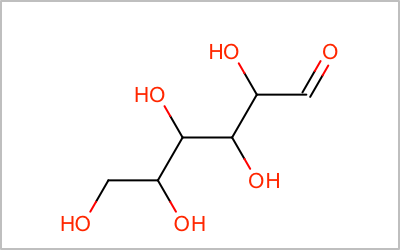
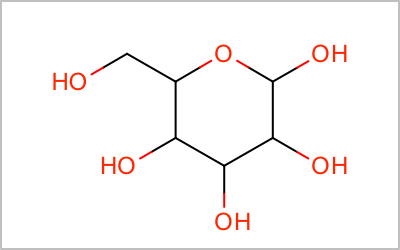
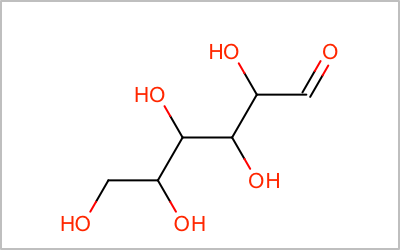
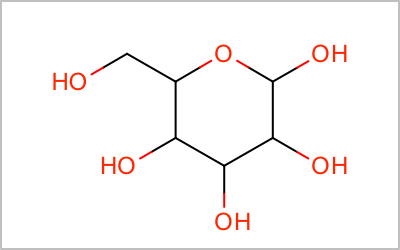

In [9]:
glucose_open_is = '[H]C(=O)[C@H](O)[C@@H](O)[C@H](O)[C@H](O)CO'
glucose_ring_is = 'C([C@@H]1[C@H]([C@@H]([C@H](C(O1)O)O)O)O)O'
glucose_open = '[H]C(=O)C(O)C(O)C(O)C(O)CO'
glucose_ring = 'C(C1C(C(C(C(O1)O)O)O)O)O'
df = to_dataframe([glucose_open_is, glucose_ring_is, glucose_open, glucose_ring])
oenb.render_dataframe(df)

## Valence tautomerism


,smiles,inchi_key,universal_protomer,Molecule
0,C1=CC2C(O2)C=C1,WDFZWSZNOFELJY-UHFFFAOYSA-N,C1=CC2C(O2)C=C1,
1,C1=CC=COC=C1,ATYBXHSAIOKLMG-UHFFFAOYSA-N,C1=CC=COC=C1,

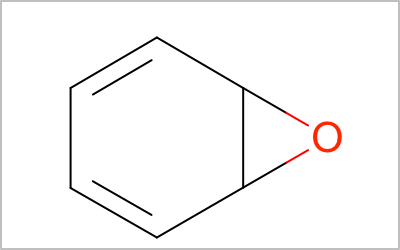
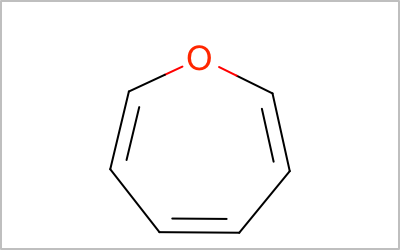

In [10]:
benzene_oxide = 'C1=CC2C(O2)C=C1'
oxepine = 'C1=CC=COC=C1'
df = to_dataframe([benzene_oxide, oxepine])
oenb.render_dataframe(df)